## 1. Find a dataset you'd like to explore. This can be something you're familiar with or something new. Create a Jupyter notebook and then:
1. Choose one variable and plot that variable four different ways.
2. Choose two continuous variables, and plot them three different ways.
3. Choose one continuous variable and one categorical variable, and plot them six different ways.
Give the pros and cons of each plot you create. You can use variables from multiple datasets if you like.
## 2. Find a dataset with at least four continuous variables and one categorical variable. Create one master plot that gives insight into the variables and their interrelationships, including:
1. Probability distributions
2. Bivariate relationships
3. Whether the distributions or the relationships vary across groups
Accompany your plot with a written description of what you see.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab 
import scipy.stats as stats
import os

In [4]:
print(os.getcwd())

C:\Users\gothv\Practice\Thinkful- Assignments


In [5]:
os.chdir('C:\\Users\\gothv\\OneDrive\\Desktop\\Data\\Datasets')


In [6]:
os.getcwd()

'C:\\Users\\gothv\\OneDrive\\Desktop\\Data\\Datasets'

In [7]:
df= pd.read_csv('titanic.csv')

In [8]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0.0,3.0,Mr. Owen Harris Braund,male,22.0,1.0,0.0,7.2500
1,1.0,1.0,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1.0,0.0,71.2833
2,1.0,3.0,Miss. Laina Heikkinen,female,26.0,0.0,0.0,7.9250
3,1.0,1.0,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1.0,0.0,53.1000
4,0.0,3.0,Mr. William Henry Allen,male,35.0,0.0,0.0,8.0500


In [9]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [10]:
df.isnull().sum()

Survived                    2
Pclass                      2
Name                        2
Sex                         2
Age                        30
Siblings/Spouses Aboard     2
Parents/Children Aboard     2
Fare                        2
dtype: int64

In [11]:
df[df.isnull().any(axis=1)].head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,0.0,3.0,Mr. Lalio Todoroff,male,NaN,0.0,0.0,7.8958
35,0.0,1.0,Mr. Alexander Oskar Holverson,male,NaN,1.0,0.0,52.0000
43,1.0,3.0,Miss. Margaret Delia Devaney,female,NaN,0.0,0.0,7.8792


In [12]:
df.dropna(how= 'all', inplace = True)

In [13]:
df.isnull().sum()

Survived                    0
Pclass                      0
Name                        0
Sex                         0
Age                        28
Siblings/Spouses Aboard     0
Parents/Children Aboard     0
Fare                        0
dtype: int64

In [14]:
df['Age'] = df['Age'].fillna((df['Age'].median()))

In [15]:
df.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [48]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000
mean,0.386441,2.303955,29.544825,0.522034,0.383051,32.335960
std,0.487209,0.836955,13.991348,1.099578,0.808010,49.831745
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.925000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,37.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [49]:
df['fam_size']= df['Siblings/Spouses Aboard']+ df['Parents/Children Aboard']

10.0

C:\Users\gothv\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


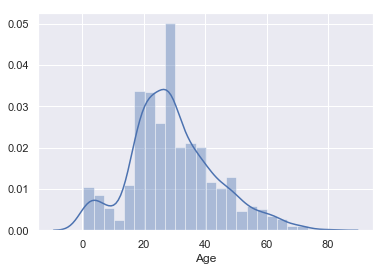

In [28]:
#1. Choose one variable and plot four different ways
sns.set()
sns.distplot(df['Age']);


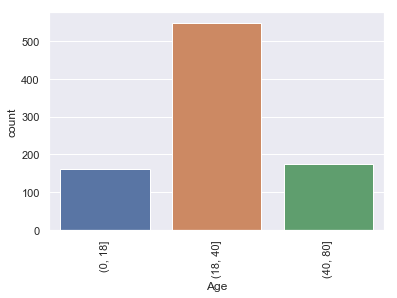

In [17]:
age = pd.cut(df['Age'], [0,18, 40, 80])
sns.countplot(x=age, data=df)
plt.xticks(rotation= 90);


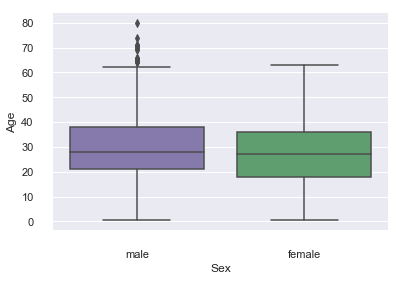

In [18]:
sns.boxplot(x="Sex", y= 'Age', palette=["m", "g"],
            data=df)
sns.despine(offset=10, trim=True)

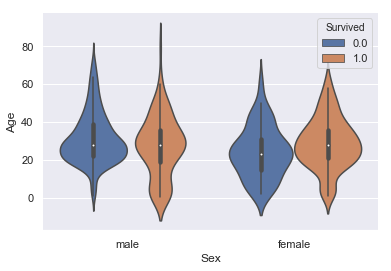

In [24]:
sns.violinplot(x='Sex', y='Age',hue='Survived',
               data=df)
sns.despine(left=True);

In [25]:
df.pivot_table('Survived', ['Sex', age], 'Pclass')


Pclass                1.0       2.0       3.0
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.490909
       (18, 40]  0.980769  0.916667  0.550000
       (40, 80]  0.967742  0.857143  0.111111
male   (0, 18]   0.800000  0.642857  0.222222
       (18, 40]  0.428571  0.083333  0.128631
       (40, 80]  0.278689  0.090909  0.054054

### Chose two continous variables and plot them three different ways.

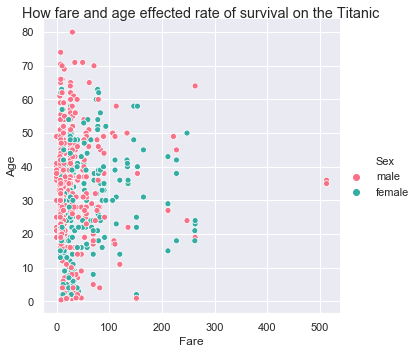

In [80]:
## My two continous variables are age and fare
g= sns.relplot(x='Fare', y='Age', hue='Sex',palette='husl', data= df);
g.fig.suptitle('How fare and age effected rate of survival on the Titanic');

**Pros:** Pretty easy to see the relationship between the two variables;
**Cons:** Not a very detailed visualization and people unfamiliar with the data might not completely understand what is happening.

C:\Users\gothv\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


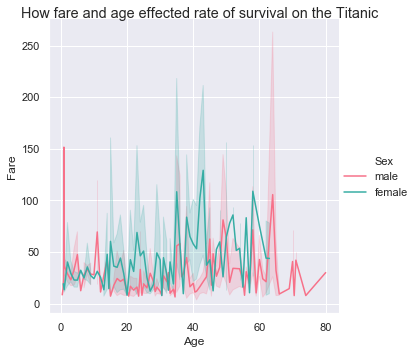

In [81]:
g2= sns.relplot(x='Age', y='Fare', hue='Sex', palette='husl', kind='line', data=df);
g2.fig.suptitle('How fare and age effected rate of survival on the Titanic');

**Pros:** Visually beautiful visualization.
**Cons:** Muddled and difficult to really get detail of what the data is telling you.

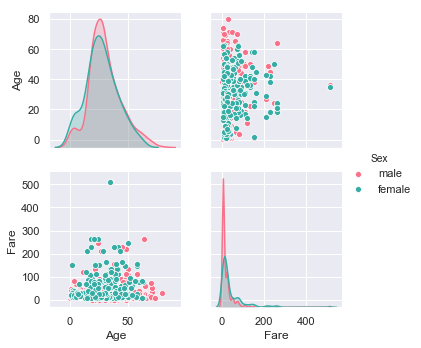

In [35]:
sns.pairplot(data=df, hue='Sex', palette='husl', vars=['Age', 'Fare']);

**Pros:** Each of the four plots are very visually appealing. Each of the four plots are relatively simple to understand.
**Cons:** No one plot is very specific and shows detailed information.

### Choose one continuous variable and one categorical variable, and plot them six different ways. Give the pros and cons of each plot you create. You can use variables from multiple datasets if you like.

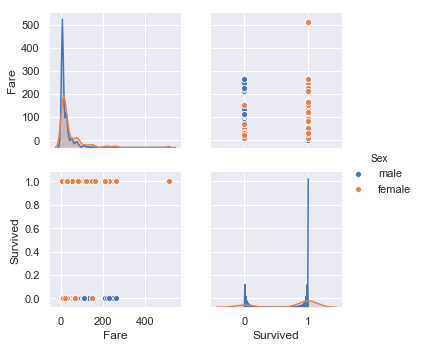

In [38]:
sns.pairplot(data=df, hue='Sex', vars=['Fare', 'Survived']);

**Pros:** Pretty easy to see the relationship between the two variables;
**Cons:** Not a very detailed visualization and people unfamiliar with the data might not completely understand what is happening.

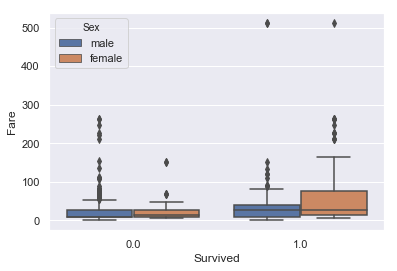

In [43]:
sns.boxplot(x='Survived', y='Fare', hue='Sex', data=df);

**Pros:** Pretty easy to see the relationship between the two variables;
**Cons:** Not a very detailed visualization of what is actually happening at the outliers. I would love to zoom in more or break the data down into more sections.

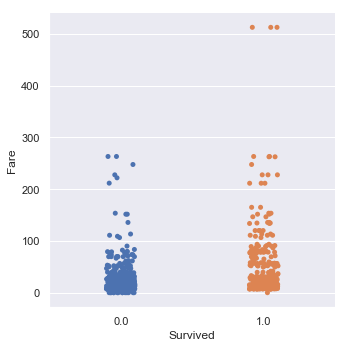

In [47]:
sns.catplot(x='Survived', y='Fare', data=df);

**Pros:** Pretty easy to see the relationship between the two variables;
**Cons:** Not a very detailed visualization and people unfamiliar with the data might not completely understand what is happening.

C:\Users\gothv\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


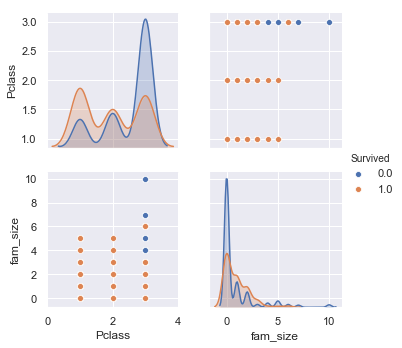

In [53]:
sns.pairplot(data=df, hue='Survived', vars=['Pclass', 'fam_size']);

I was tired of using the same two variables in this data set so I decided to create a new feature(fam_size) that let me know the total number of family members aboard each passenger had.

**Pros:** Pretty easy to see the relationship between the two variables;
**Cons:** Not really sure just how much I get out of the scatterplots about if there is a relationship between passenger class and family size.

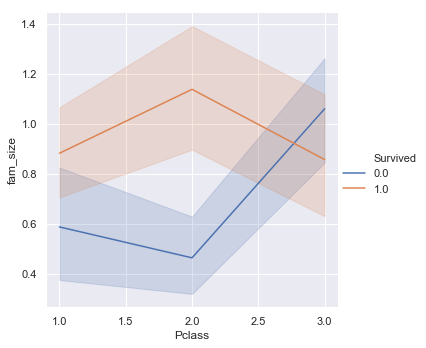

In [60]:
sns.relplot(x='Pclass', y='fam_size', hue='Survived', kind='line', data=df);

**Pros:** The visualization is pretty and easy to read.
**Cons:** Not a very detailed representation of the relationship between class, family size, and survival. 

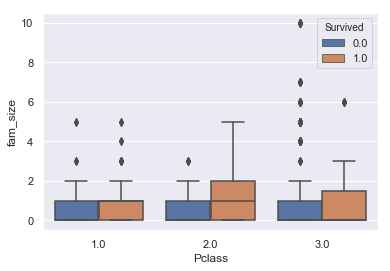

In [61]:
sns.boxplot(x='Pclass', y='fam_size', hue='Survived', data=df);

**Pros:** Pretty easy to see the relationship between the two variables;
**Cons:** Not a very detailed visualization of what is actually happening at the outliers. I would love to zoom in more or break the data down into more sections.

# Part two
##  Find a dataset with at least four continuous variables and one categorical variable. Create one master plot that gives insight into the variables and their interrelationships, including:
* Probability distributions
* Bivariate relationships
* Whether the distributions or the relationships vary across groups.
### Accompany your plot with a written description of what you see.

In [62]:
census_df=pd.read_csv('acs2017_census_tract_data.csv')

In [66]:
census_df.head()

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


In [65]:
census_df.columns

Index(['TractId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [73]:
new_df= census_df[['State', 'TotalPop', 'Men', 'Women', 'IncomePerCap']].copy()

In [74]:
new_df.head()

,State,TotalPop,Men,Women,IncomePerCap
0,Alabama,1845,899,946,33018.0
1,Alabama,2172,1167,1005,18996.0
2,Alabama,3385,1533,1852,21236.0
3,Alabama,4267,2001,2266,28068.0
4,Alabama,9965,5054,4911,36905.0


C:\Users\gothv\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\gothv\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


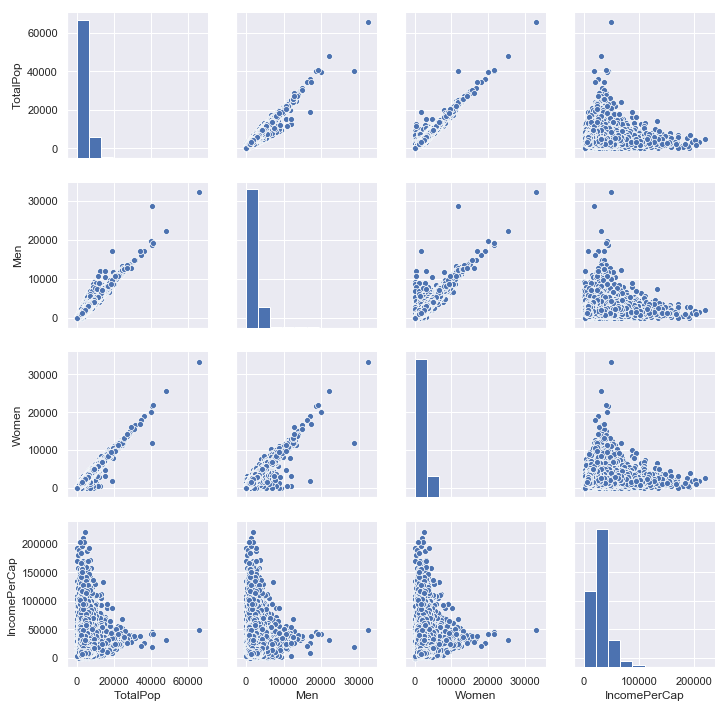

In [75]:
sns.pairplot(data=new_df, palette='husl');

I decided to use a data set I already have access to and am familiar with, the 2017 U.S. Census Data, and segmented that df to see only the features I wanted to take a closer look at. I chose to use a pair plot because it takes each of the features I selected and plots them against each other individually. 

**While looking at this plot I noticed several interesting things:**
1. Income per capita is higher in less populated areas, which makes complete sense.
2. There is a linear relationship in both women and men in relation to the total population.
3. The relationships between income per capita and sex are similar but the graph of women vs. incomepercap is most similar to the income per cap vs. total population curve.
